## Hurricanes per Year

In [6]:
from scipy.stats import poisson
x = 1 - poisson.cdf(15 - 1, mu=6.3)
print(x < 0.022)

True


## Pairwise t-test

In [9]:
import numpy as np
from scipy.stats import t
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

In [14]:
diff= post - pre
mean_diff = np.mean(diff)
std_diff = np.std(diff)  

# Calculating the standard error of the mean difference
sem_diff = std_diff/np.sqrt(len(diff))
t_critical = t.ppf(1 -0.05/ 2, len(diff) - 1)
t_statistic = mean_diff / (sem_diff / np.sqrt(2))
p_value=2*(1 - t.cdf(np.abs(t_statistic), len(diff) - 1))

## Curve fitting of temperature in Alaska

In [15]:
from scipy.optimize import curve_fit

months = np.arange(1, 13)
max_temps = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_temps = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

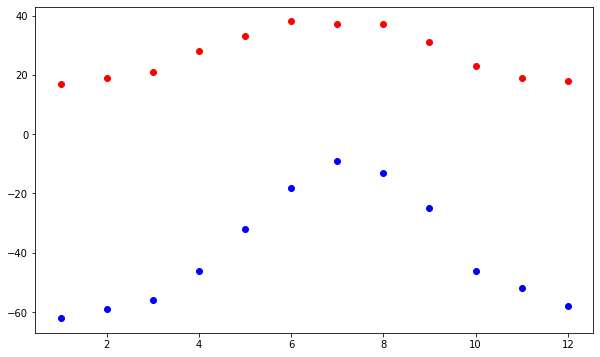

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(months, max_temps, 'ro', label='Max Temperatures')
plt.plot(months, min_temps, 'bo', label='Min Temperatures')
plt.show()

In [18]:
def temp_function(x, amplitude, phase, offset):
    return amplitude * np.sin(2 * np.pi * (x + phase) / 12) + offset

# fitting the data
popt_max, pcov_max = curve_fit(temp_function, months, max_temps)
popt_min, pcov_min = curve_fit(temp_function, months, min_temps)

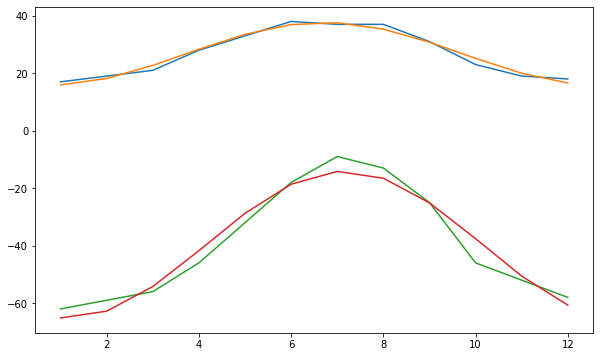

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(months, max_temps)
plt.plot(months, temp_function(months, *popt_max))
plt.plot(months, min_temps)
plt.plot(months, temp_function(months, *popt_min))

## Fit the residues

In [20]:
from scipy.stats import poisson
from scipy.optimize import curve_fit
from scipy.stats import chisquare
import pickle

In [21]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

'wget' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


In [36]:
with open('./residuals_261.pkl', 'rb') as f:
    data = pickle.load(f)
data

array({'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])},
      dtype=object)

In [37]:
res=data['residuals']
dis=data['distances']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
bin_edges = np.linspace(min(res), max(res), 30)
hist, _ = np.histogram(res, bins=bin_edges)

In [ ]:
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_uncertainties = np.sqrt(hist).astype(int)
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, hist, width=np.diff(bin_edges))
plt.errorbar(bin_centers, hist, yerr=bin_uncertainties)

In [38]:
def gaussian(x, amplitude, mean, std_dev):
    return amplitude * np.exp(-(x - mean)**2 / (2 * std_dev**2))

In [ ]:
popt, _ = curve_fit(gaussian, bin_centers, hist, sigma=bin_uncertainties, absolute_sigma=True)
# Plotting the fitted function
fit_curve = gaussian(bin_centers, *popt)
plt.plot(bin_centers, fit_curve)
chi_squared, p_value = chisquare(hist, f_exp=fit_curve)

## Temperatures in Munich

In [42]:
data = np.loadtxt('./munich_temperatures_average_with_bad_data.txt', delimiter=' ')

In [43]:
years = data[:, 0]
temperatures = data[:, 1]

In [44]:
def cosine_model(t,a,b,c):
    return (a*np.cos(2*np.pi*t+b)+c)

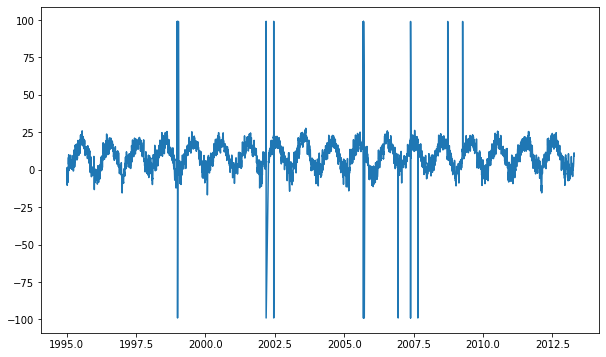

In [45]:
mask =(years>=2008)&(years<=2012)
years_subset=years[mask]
temperatures_subset= temperatures[mask]

popt,pcov = curve_fit(cosine_model, years_subset, temperatures_subset)

plt.figure(figsize=(10,6))
plt.plot(years, temperatures, label='Data')

In [46]:
a, b,c= popt
a_error,b_error,c_error= np.sqrt(np.diag(pcov))
average_temperature = np.mean(temperatures)
coldest_time = cosine_model(0, *popt)
hottest_time = cosine_model(0.5, *popt)